In [1]:
import numpy as np
import networkx as nx

In [2]:
class Graph:
    def __init__(self,arcs):
        self.arcs = arcs.copy()
        self.matrix_of_incidence = self.convert_incidence(self.arcs)
        self.incidence_list = self.list_of_incidence(self.arcs)
        self.matrix_adjacency = self.convert_adjacency(self.arcs)
        self.free_vertexes = []
        
    def convert_incidence(self, arcs):
        arcs = arcs.copy()
        n = max(max(arcs[i]) for i in range(len(arcs)))+1
        matrix_of_incidence = np.zeros((n,len(arcs)))
        for i in range(len(arcs)):
            matrix_of_incidence[arcs[i,0]][i] = 1
            matrix_of_incidence[arcs[i,1]][i] = 1
        return matrix_of_incidence       
    
    def convert_adjacency(self, arcs):
        arcs = arcs.copy()
        n = max(max(arcs[i]) for i in range(len(arcs)))+1
        matrix_of_adjacency = np.zeros((n,n))
        for i in range(len(arcs)):
            matrix_of_adjacency[arcs[i,0]][arcs[i,1]] = 1
            matrix_of_adjacency[arcs[i,1]][arcs[i,0]] = 1
        return matrix_of_adjacency    
        
    
    def list_of_incidence(self, arcs):
        arcs = arcs.copy()
        incidence = {}
        for i in range(len(arcs)):
            for j in range(2):
                if arcs[i,j] not in incidence:
                    incidence[arcs[i,j]] = []
                    if j == 1:
                        incidence[arcs[i,j]].append(arcs[i,0])
                    else:
                        incidence[arcs[i,j]].append(arcs[i,1])
                else:
                    if j == 0:
                        incidence[arcs[i,j]].append(arcs[i,1])
                    else:
                        incidence[arcs[i,j]].append(arcs[i,0])
        return incidence
    

    def add_arc(self, arc):
        self.arcs = np.append(self.arcs, arc)
        self.arcs = self.arcs.reshape((len(self.arcs)//2,2))
        self.matrix_of_incidence = self.convert_incidence(self.arcs)
        self.incidence_list = self.list_of_incidence(self.arcs)
        self.matrix_adjacency = self.convert_adjacency(self.arcs)
        
    def delete_arc(self, arc):
        arc = arc.copy()
        num = 0
        for i in range(len(self.arcs)):
            num = i
            if self.arcs[i,0] == arc[0] and self.arcs[i,1] == arc[1]:
                break
        b = self.arcs[:i]
        c = self.arcs[i+1:]
        b = np.append(b,c)
        self.arcs = b.reshape(len(b)//2,2)
        self.matrix_of_incidence = self.convert_incidence(self.arcs)
        self.incidence_list = self.list_of_incidence(self.arcs)
        self.matrix_adjacency = self.convert_adjacency(self.arcs)
        
    def add_vertex(self, vertex):
        if vertex in self.arcs:
            return _
        self.free_vertexes.append(vertex)
        #добавляем вершину в матрицу смежности создавая пустые столбец и строку
        temporary_matrix_adjacency = np.zeros((len(self.matrix_adjacency)+1,len(self.matrix_adjacency)+1))
        for i in range(len(self.matrix_adjacency)):
            for j in range(len(self.matrix_adjacency)):
                temporary_matrix_adjacency[i,j] = self.matrix_adjacency[i,j]
        self.matrix_adjacency = temporary_matrix_adjacency
        #добавляем вершину в матрицу инцидентности добавляя пустой столбец
        temporary_matrix_incidence = np.zeros((len(self.matrix_of_incidence)+1,len(self.arcs)))
        for i in range(len(self.matrix_of_incidence)):
            for j in range(len(self.arcs)):
                temporary_matrix_incidence[i,j] = self.matrix_of_incidence[i,j]
        self.matrix_of_incidence = temporary_matrix_incidence       
        #добавляем вершину в список инцидентности
        self.incidence_list[vertex] = []
        
    def delete_vertex(self, vertex):
        flag = 0
        if vertex in self.free_vertexes:
            self.free_vertexes.remove(vertex)
            return _
        for arc in self.arcs:
            if vertex in arc:
                self.delete_arc(arc)
                flag = 1
        if flag == 0:
            self.matrix_of_incidence = self.convert_incidence(self.arcs)
            self.incidence_list = self.list_of_incidence(self.arcs)
            self.matrix_adjacency = self.convert_adjacency(self.arcs)
            for i in self.free_vertexes:
                self.add_vertex(i)

In [3]:
list_of_arcs = np.array([[1,0],[1,2],[1,4],[2,3],[2,4],[3,4]])
print(list_of_arcs)
g = Graph(list_of_arcs)
print("Матрица инцидентности \n",g.matrix_of_incidence)
print("Список инцидентности \n",g.incidence_list)
print("Матрица смежности \n",g.matrix_adjacency)
g.add_arc(np.array([1,3]))
print("Добавили ребро 1,3 \n",g.arcs)
g.delete_arc([1,3])
print("Матрица инцидентности \n",g.matrix_of_incidence)
print("Список инцидентности \n",g.incidence_list)
print("Матрица смежности \n",g.matrix_adjacency)
print("Удалили ребро 1,3 \n",g.arcs)
g.add_vertex(1)
print("Матрица смежности \n",g.matrix_adjacency)
print(g.free_vertexes)
print("Матрица инцидентности \n",g.matrix_of_incidence)
print("Список инцидентности \n",g.incidence_list)


[[1 0]
 [1 2]
 [1 4]
 [2 3]
 [2 4]
 [3 4]]
Матрица инцидентности 
 [[1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1.]]
Список инцидентности 
 {1: [0, 2, 4], 0: [1], 2: [1, 3, 4], 4: [1, 2, 3], 3: [2, 4]}
Матрица смежности 
 [[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1.]
 [0. 1. 1. 1. 0.]]
Добавили ребро 1,3 
 [[1 0]
 [1 2]
 [1 4]
 [2 3]
 [2 4]
 [3 4]
 [1 3]]
Матрица инцидентности 
 [[1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1.]]
Список инцидентности 
 {1: [0, 2, 4], 0: [1], 2: [1, 3, 4], 4: [1, 2, 3], 3: [2, 4]}
Матрица смежности 
 [[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1.]
 [0. 1. 1. 1. 0.]]
Удалили ребро 1,3 
 [[1 0]
 [1 2]
 [1 4]
 [2 3]
 [2 4]
 [3 4]]
Матрица смежности 
 [[0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1.]
 [0. 1. 1. 1. 0.]]
[]
Матрица инцидентности 
 [[1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0

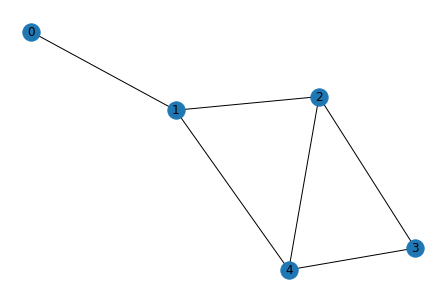

In [4]:
G = nx.from_numpy_matrix(g.matrix_adjacency)
nx.draw(G, with_labels=True)

In [82]:
def the_longest_path(graph, k):
    if len(graph.incidence_list.keys()) < k: #количество вершин должно соответствовать k
        return False
    if len(graph.arcs) < k: #количество ребер должно соответствовать k
        return False 
    paths = []
    vertexes = sorted(list(graph.incidence_list.keys())) #список вершин
    for i in vertexes:
        paths.append([i])
    flag = True
    for path in paths:
        for vertex in graph.incidence_list[path[-1]]:
            if vertex not in path:
                new_path = path[:]
                new_path.append(vertex)
                paths.append(new_path)
                flag = True
    return paths

In [79]:
a = the_longest_path(g, 4)
a[-1]

[4, 3, 2, 1, 0]

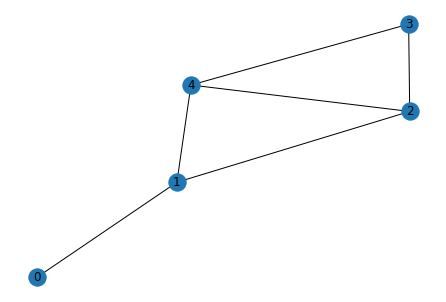

In [80]:
G = nx.from_numpy_matrix(g.matrix_adjacency)
nx.draw(G, with_labels=True)

In [81]:
if (len(a[-1]) - 1) < 4:
    print('Пути нет')